<a href="https://colab.research.google.com/github/afrojaakter/Numerical-Analysis/blob/main/Fall2019HW_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!pip install pyamg
import pyamg
from numpy import *
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from pyamg.gallery import stencil_grid
from mpl_toolkits.mplot3d import Axes3D

def ConjugateGradient(A, f, err_tol):
  u0 = zeros((A.shape[0],1))
  r0 = f - A.dot(u0)
  p0 = r0 
  #print(p0.shape, r0.shape, f.shape,A.dot(u0).shape)
  itnum = 1
  while linalg.norm(r0) > err_tol:      
    for i in range(10):  
      rdotr =  (r0.T).dot(r0) 
      #print('r:',rdotr.shape)
      Ap = A.dot(p0)  
      pAp = (p0.T).dot(Ap)
      alpha_k = rdotr/pAp
      u = u0 + alpha_k*p0      
      r = r0 - alpha_k*Ap
      if linalg.norm(r) < err_tol:
        break      
      else:
          rdotr_new = (r.T).dot(r)
          beta_k = rdotr_new/rdotr
          p = r + beta_k*p0
          u0 = u
          r0 = r
          p0 = p
    #itnum +=1
  return itnum, r 
                      
N_list=[8]                    
H = empty(0)
CG_error = empty(0)
CGiter_num = empty(0)
cond_num = empty(0)

for N in N_list:
  stencil = [[0,-1,0],[-1,4,-1],[0,-1,0]] 
  grid = (N-2,N-2)
  h = 1/(N-1)
  H = append(H,h)
  x = linspace(h, 1-h, N-2)
  y = linspace(h, 1-h, N-2)
  X,Y = meshgrid(x,y) 
  X = X.reshape(-1,)
  Y = Y.reshape(-1,)

  A = stencil_grid(stencil, grid, dtype=float, format='csr') #the block matrix
  
  f_numeric = reshape((h**2)*f(X,Y),(A.shape[0],1))
  #u =ConjugateGradient(A, f_numeric, 1e-6)
  u1 = sparse.linalg.cg(A, f_numeric, x0 = None, tol = 1e-6)
  print(u,u1)

  [n, e_CG] = ConjugateGradient(A, f_numeric, 1e-2)
  CG_error = append(CG_error,e_CG)
  CGiter_num = append(CGiter_num, n)
print('iteration number', CGiter_num, '\n error', CG_error)   
  

In [ ]:
#Numerical HW: Due date 22 Nov
#!pip install pyamg
import pyamg
from numpy import *
import scipy.sparse as sparse
from pyamg.gallery import stencil_grid
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 12})


def u_true(x,y):
  return sin(2*pi*x)*sin(2*pi*y)

def f(x,y):
  'negative of the second derivative of u'
  return 8*pi**2*sin(2*pi*x)*sin(2*pi*y)

def Rchrd_itrn_method(A,f,err_tol):
  itnum = 1
  u0 = zeros((A.shape[0],1))
  e_r = 1
  while e_r > err_tol:
    for i in range(itnum):   
      u = u0 - 0.25*(A.dot(u0) - f)              
      e_rNew = linalg.norm(u - u0) 
      u0 = u
    e_r = e_rNew
    itnum +=1   
  return itnum, e_r , u

def Jacobi(A, f, err_tol):
  L = sparse.tril(A, k = -1)
  U = sparse.triu(A, k = 1)
  D = sparse.tril(A) - L
  itnum = 1
  u0 = zeros((A.shape[0],1))
  e_r = 1
  while e_r > err_tol:  
    for i in range(itnum):  
      u1 = f - (L+U).dot(u0) 
      u = sparse.linalg.spsolve(D,u1)          
      e_rNew = linalg.norm(u - u0) 
      u0 = u
    e_r = e_rNew
    itnum +=1
  return itnum, e_r, u

def GaussSeidel(A, f, err_tol):
  L = sparse.tril(A)
  U = sparse.triu(A, k = 1)
  itnum = 1
  u0 = zeros((A.shape[0],1))
  e_r = 1
  while e_r > err_tol:  
    for i in range(itnum):   
      u2 = f - U.dot(u0)
      u = sparse.linalg.spsolve(L,u2) 
      u = reshape(u, (len(u0),1))         
      e_rNew = linalg.norm(u - u0) 
      u0 = u
    e_r = e_rNew
    itnum +=1
  return itnum, e_r, u

def conditionNUmber(A):
  a = linalg.eigvals(A.toarray())
  return max(a)/min(a)
  
N_list=[4,8,16,32]                    
H = empty(0)
error = empty(0)

Rchrd_error = empty(0)
Rciter_num = empty(0)

jc_error = empty(0)
jciter_num = empty(0)

GS_error = empty(0)
GSiter_num = empty(0)

cond_num = empty(0)

for N in N_list:
  stencil = [[0,-1,0],[-1,4,-1],[0,-1,0]] 
  grid = (N-2,N-2)
  h = 1/(N-1)
  H = append(H,h)
  x = linspace(h, 1-h, N-2)
  y = linspace(h, 1-h, N-2)
  X1,Y1 = meshgrid(x,y)
  X = X1.reshape(-1,)
  Y = Y1.reshape(-1,)
  #Question:(1)
  A = stencil_grid(stencil, grid, dtype=float, format='csr') #the block matrix
  #Type "print(A.todense())" to see the matrix

  k = conditionNUmber(A)
  cond_num = append(cond_num,k)
  

  utrue = reshape(u_true(X,Y), (A.shape[0],1))

  f_numeric = reshape((h**2)*f(X,Y),(A.shape[0],1))
  u_numeric = sparse.linalg.spsolve(A,f_numeric)
  
  #Solving u = inv(A)*f
  e = linalg.norm(u_numeric - u_true(X,Y))/linalg.norm(u_true(X,Y))
  error = append(error,e)
  
  #Richardson Itereation:
  [n, e_rc, u_rc] = Rchrd_itrn_method(A, f_numeric, 1e-6)
  Rchrd_error = append(Rchrd_error,e_rc)
  Rciter_num = append(Rciter_num, n)

  #Jacobi Iteration:
  [n, e_jc,u_jc] = Jacobi(A, f_numeric, 1e-6)
  jc_error = append(jc_error,e_jc)
  jciter_num = append(jciter_num, n)
 
  #Gauss-Seidel Iteration:
  [n, e_GS, u_GS] = GaussSeidel(A, f_numeric, 1e-6)
  GS_error = append(GS_error,e_GS)
  GSiter_num = append(GSiter_num, n)
  
  #Conjugate gradient:
  u1 = sparse.linalg.cg(A, f_numeric, x0 = None, tol = 1e-6)  
  u1 = reshape(u1[0],(len(u1[0]),1))
  
print('h',H, '\n error', error)
print('condition number:', cond_num)
print('iteration number', Rciter_num, '\n error', Rchrd_error,)
print('itNUm:', jciter_num, '\n error', jc_error)
print('iteration number', GSiter_num, '\n error', GS_error)


if False:  # make it "True" to see the plots.

  plt.figure()
  plt.loglog(H,error,'o-', label = 'error')
  plt.loglog(H,H**2,'o-', label = r'$O(h^2)$')
  plt.xlabel('h')
  plt.ylabel(r'$||u - \widetilde{u}||$')
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(N_list, Rciter_num,'o-', label = 'RCiteration number')
  plt.xlabel('N')
  plt.ylabel('Iteration Number')
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(N_list, jciter_num,'o-', label = 'JCiteration number')
  plt.xlabel('N')
  plt.ylabel('Iteration Number')
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(N_list, GSiter_num,'o-', label = 'GSiteration number')
  plt.xlabel('N')
  plt.ylabel('Iteration Number')
  plt.legend()
  plt.grid()

  plt.figure()
  plt.loglog(N_list, cond_num,'o-', label = r'$K(A)$')
  plt.xlabel('N')
  plt.ylabel(r'$K(A)$')
  plt.legend()
  plt.grid()

  ax1 = sns.heatmap(reshape(utrue,(N-2,N-2)), linewidth=0.5, cmap= 'RdBu')
  plt.show()

  ax1 = sns.heatmap(reshape(u_numeric, (N-2,N-2)), linewidth=0.5, cmap= 'RdBu')
  plt.show()

  ax1 = sns.heatmap(reshape(u_rc, (N-2,N-2)), linewidth=0.5, cmap= 'RdBu')
  plt.show()

  ax1 = sns.heatmap(reshape(u_GS, (N-2,N-2)), linewidth=0.5, cmap= 'RdBu')
  plt.show()

  u = reshape(u1, (N-2,N-2))
  ax = sns.heatmap(u, linewidth=0.5, cmap= 'RdBu')
  plt.show()

  fig = plt.figure(figsize=(10, 7))
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(X1, Y1, reshape(utrue,(N-2,N-2)), rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('u')
  ax.set_title('Exact solution')
  fig.colorbar(surf, shrink=0.5, aspect=5) 
  ax.view_init(50, 35)

  fig = plt.figure(figsize=(10, 7))
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(X1, Y1, reshape(u_numeric, (N-2,N-2)), rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('u')
  ax.set_title('Numerical solution')
  fig.colorbar(surf, shrink=0.5, aspect=5) 
  ax.view_init(60, 35)

  fig = plt.figure(figsize=(10, 7))
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(X1, Y1, reshape(u_rc, (N-2,N-2)), rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('u')
  ax.set_title('Richardson solution')
  fig.colorbar(surf, shrink=0.5, aspect=5) 
  ax.view_init(50, 35)


  fig = plt.figure(figsize=(10, 7))
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(X1, Y1, reshape(u_GS, (N-2,N-2)), rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('u')
  ax.set_title('GS solution')
  fig.colorbar(surf, shrink=0.5, aspect=5) 
  ax.view_init(50, 35)

  fig = plt.figure(figsize=(10, 7))
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(X1, Y1, reshape(u1, (N-2,N-2)), rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('u')
  ax.set_title('CG solution')
  fig.colorbar(surf, shrink=0.5, aspect=5) 
  ax.view_init(60, 35)

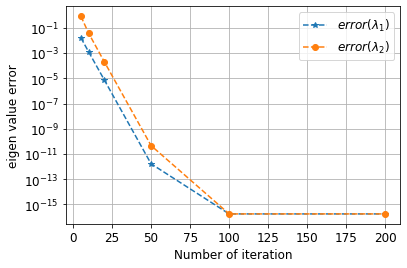

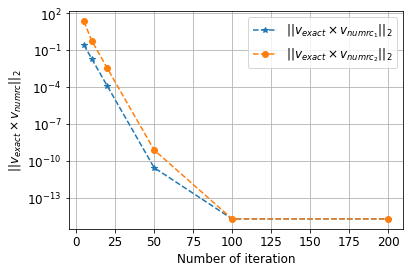

In [ ]:
#Numerical HW: Problem Number 10:
from numpy import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

def power_method(A, w0, tol, nmax):
  q= w0/linalg.norm(w0)
  q2 = q
  iter = 0
  w = A.dot(q)
  while iter <= nmax:
        q = w/linalg.norm(w)
        w = A.dot(q)
        lamda = q.dot(w)
        x = q
        w2 = q2.dot(A)
        q2 = w2/linalg.norm(w2)
        y1 = q2
        costheta = abs(y1.dot(x))        
        if costheta >= 5e-2:
            iter = iter + 1            
            temp = linalg.norm(w-lamda*(q))/costheta                  
  return lamda, x  #return maximum eigen value and the corresponding eigen vector of the matrix A 

A = array([[1, -1, 2],[-2, 0, 5],[6, -3, 6]])
w, v = linalg.eig(A)   #exact eigen value and the eigen vectors of A

p1 = array([1/sqrt(3),1/sqrt(3), 1/sqrt(3)]) # First initial guess
x2 = array([1, 6, 4])
x3 = array([1, 2, 0])
w0 = (1/3)*x2 - (2/3)*x3
p2 = w0/linalg.norm(w0)  # the second initial guess 

N = [5,10,20,50,100,200]
V = [5,16,18]   # the exact eigen vector corresponding to the max eigen value

egval1 = empty(0)
egvec1 = empty(0)
egval2 = empty(0)
egvec2 = empty(0)              

for i in N:
    A1 = power_method(A, p1, 10e-10, i)   
    A2 = power_method(A, p2, 10e-10, i)
    
    egval_error1 = abs(w.max() - A1[0])/abs(w.max())          #relative error of eigen values with first initial guess
    egval_error2 = abs(w.max() - A2[0])/abs(w.max())          #relative error of eigen values with second initial guess

    egvec_error1 = linalg.norm(cross(V, A1[1]))               #length of the cross product between the eigen vectors (exact and approximated) with first initial guess
    egvec_error2 = linalg.norm(cross(V, A2[1]))               #length of the cross product between the eigen vectors (exact and approximated) with second initial guess

    egval1 = append(egval1, egval_error1)                 
    egvec1 = append(egvec1, egvec_error1)                 

    egval2 = append(egval2, egval_error2)                 
    egvec2 = append(egvec2, egvec_error2 )                


plt.figure()
plt.semilogy(N,egval1, '*--',label = r'$error({\lambda_1})$')
plt.semilogy(N, egval2,'o--', label = r'$error({\lambda_2})$')
plt.ylabel('eigen value error')
plt.xlabel('Number of iteration')
plt.legend()
plt.grid()

plt.figure()
plt.semilogy(N,egvec1, '*--',label = r'$||v_{exact}\times v_{numrc_1}||_2$')
plt.semilogy(N, egvec2,'o--', label = r'$||v_{exact}\times v_{numrc_2}||_2$')
plt.ylabel(r'$||v_{exact}\times v_{numrc}||_2$')
plt.xlabel('Number of iteration')
plt.legend()
plt.grid()

Although from the exact arithmetic the seqence(5.17) converges to the pair $\lambda

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
N = [100, 10**3, 10**4, 10**4, 10**5, 10**6]
for n in N:
  X = random.uniform(-1,1,n)
  Y= random.uniform(-1,1,n)
  sum = 0
  for x,y in zip(X,Y):    
    if x**2+y**2<=1: 
      sum = sum + 1
  print(sum, 4*sum/n, pi)
  
  plt.figure()
  plt.plot(X,Y,'.')
  plt.title("N=%i"%n)
  plt.xlabel('X')
  plt.ylabel("Y")

[2.66666667 2.8952381  3.01707182 3.07915339 3.11035027 3.12596861
 3.13378027] [3.125      3.14115513 3.14159198 3.14159265 3.14159265 3.14159265
 3.14159265] [0.47492599 0.24635456 0.12452084 0.06243926 0.03124238 0.01562405
 0.00781238] [1.65926536e-02 4.37519661e-04 6.71231410e-07 3.84270393e-12
 4.44089210e-16 4.44089210e-16 4.44089210e-16]


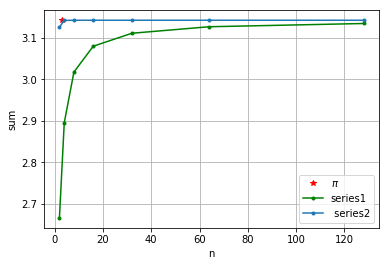

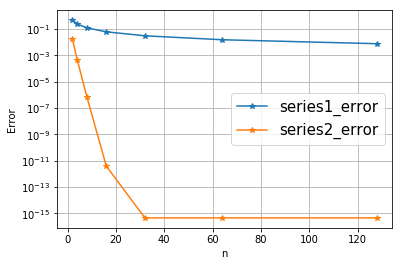

In [ ]:
#Numerical HW
#12
from IPython import get_ipython
get_ipython().magic('reset -sf')
from numpy import *
import matplotlib.pyplot as plt


N = [2, 4, 8, 16, 32, 64, 128]
def sum1(N):
  list_sum = empty(0)
  for i in N:
    sum=0 
    for n in range(i):
      n_term = 4*((-1)**n/(2*n +1))
      sum += n_term
    list_sum = append(list_sum, sum)

  return list_sum

def sum2(N):
  list_sum = empty(0)
  for i in N:
    s=0.0 
    numerator1 = 1.0
    denom1 = 1.0
    for n in range(i):           
      if n >= 1:        
        numerator1 *= 2.0*n -1.0
        denom1 *= 2.0*n
      else:
        numerator1 = 1.0
        denom1 = 1.0  
        
      n_term = 6.0*(numerator1*(0.5)**(2.0*n+1.0))/(denom1*(2.0*n +1.0))
      s += n_term      
    list_sum = append(list_sum, s)
    
  return list_sum


error1 = abs(pi - sum1(N))
error2 = abs(pi - sum2(N))


plt.figure()
plt.plot(pi,pi,'r*', label = '$\pi$')
plt.plot(N, sum1(N),'g.-', label = 'series1')
plt.plot(N, sum2(N),'.-', label = ' series2')
plt.xlabel('n')
plt.ylabel('sum')
plt.legend()
plt.grid()


plt.figure()
plt.semilogy(N, error1,'*-', label = 'series1_error')
plt.semilogy(N, error2, '*-', label = 'series2_error')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend(prop={'size': 15})
plt.grid()

print(sum1(N), sum2(N), error1, error2)

[0.         0.         0.         ... 1.00000049 1.0000005  1.0000005 ] [1.         1.         1.         ... 1.00000049 1.0000005  1.0000005 ]


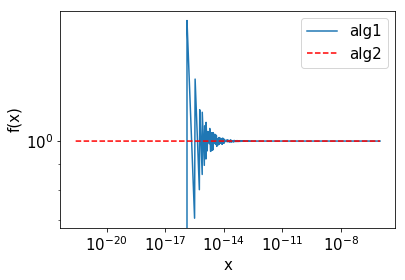

In [ ]:
#Problem 13
from numpy import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
random.seed(1)

alg1 = empty(0)
alg2 = empty(0)

def rnd():
    exp = random.randint(-19, -5)  
    return random.random()*10**exp

def Algorithm1(x):
  if x ==0:
    f = 1
  else:
    f = (exp(x) - 1)/x
  return f
    
def Algorithm2(x):
  y = exp(x)
  if y == 1:
    f = 1
  else:
    f = (y-1)/log(y)
  return f

x = array([rnd() for _ in range(2000)])
x.sort()
for i in x:  
  alg1 = append(alg1, Algorithm1(i))
  alg2 = append(alg2, Algorithm2(i))

#print(alg1, alg2)

plt.figure()
plt.loglog(x, alg1, '-', label = 'alg1')
plt.loglog(x, alg2, 'r--', label = 'alg2')
plt.xlabel('x', fontsize =15)
plt.ylabel('f(x)', fontsize = 15)
plt.legend(prop={'size': 15})





[array([1.33226763e-15, 1.42108547e-13, 2.28174031e-07, 2.10435000e+04,
       8.69391359e+10, 4.72848830e+14]), [3, 6, 12, 24, 48, 96]]


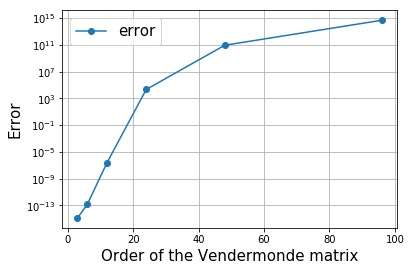

In [ ]:
# Problem 3
from __future__ import absolute_import, division, print_function

from IPython import get_ipython
get_ipython().magic('reset -sf')
from numpy import *
import matplotlib.pyplot as plt

N=[3,6,12,24,48,96]
def vendermonde_system(N):
  error_max = empty(0)
  for n in N:
    A = empty((0,n))
    f = empty(0)
    a_exact = array([0,1,-1])
    for i in range(n):
      if i>=3: 
        a_exact = append(a_exact, 0)

      xi = (i+1)/n
      row_i = empty(0)

      for j in range(n):
        xi_n = xi**j
        row_i = asarray(append(row_i, xi_n))

      f_i = (i+1)/n - ((i+1)/n)**2

      f = append(f, f_i) 
         
      A = append(A, [row_i], axis = 0)   

    a_numeric = matmul(linalg.inv(A),f)
    error = a_exact - a_numeric
    error_inf = linalg.norm(error,  inf)
    error_max = append(error_max, error_inf)
  return error_max

print([vendermonde_system(N),N])

plt.figure()
plt.semilogy(N, vendermonde_system(N),'o-',label = 'error')
plt.xlabel('Order of the Vendermonde matrix',fontsize = 15)
plt.ylabel('Error',fontsize = 15)
plt.legend(prop={'size': 15})
plt.grid()

